In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', None)        # don't wrap lines
pd.set_option('display.max_colwidth', None) # show full cell content

# loading the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [2]:
# cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# turning the skills list strings into actual lists with --> ast.literal_eval
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_country'] == "United States") & (df['job_title_short'] == "Data Analyst")]
df_location_plot = df_DA_US['job_location'].value_counts().head(10).to_frame().reset_index()
df_location_plot.columns = ['Job Location', 'Job Count']

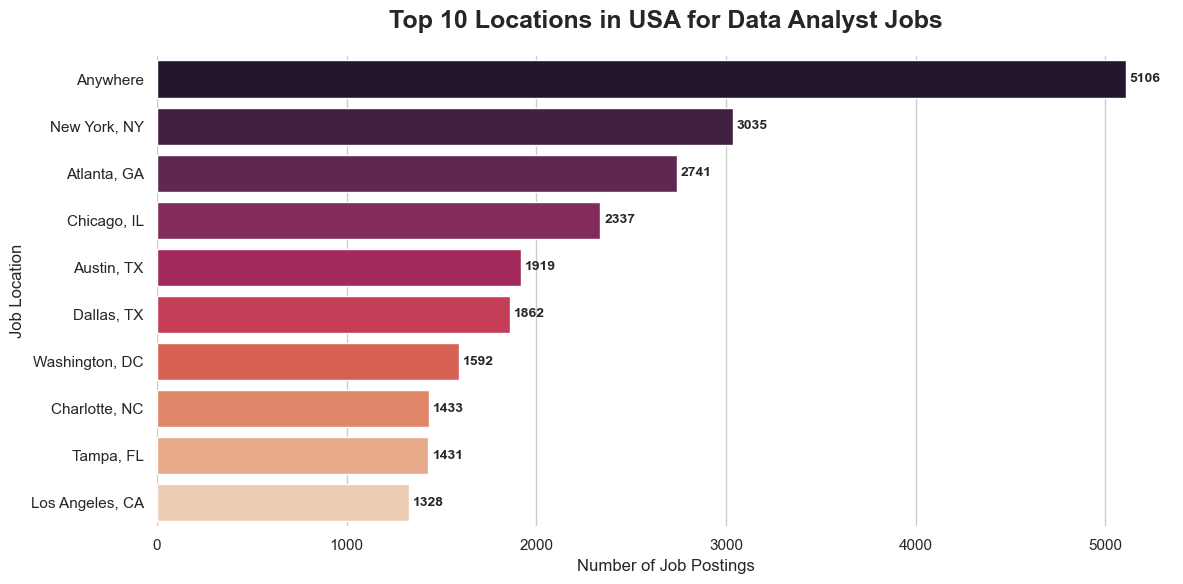

In [14]:
# reversing the data frame
df_location_plot = df_location_plot.sort_values('Job Count', ascending=False)

# Set seaborn style
sns.set_theme(style="whitegrid")

# create a barplot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=df_location_plot,
    x='Job Count',
    y='Job Location',
    hue='Job Location',
    palette='rocket',
    legend=False,
    edgecolor='white'
)

# Add titles and labels
plt.title('Top 10 Locations in USA for Data Analyst Jobs', fontsize=18, weight='bold', pad=20, loc='center')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Job Location', fontsize=12)

# Add numeric labels on bars
for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, weight='bold')

# Style tweaks
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

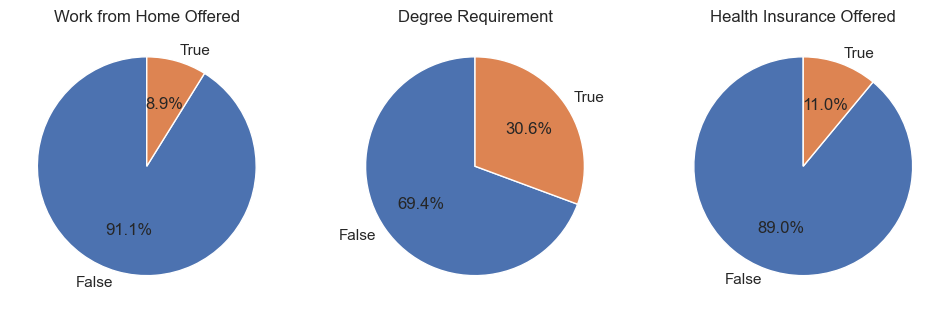

In [5]:
# defining title for each of the three pie charts
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

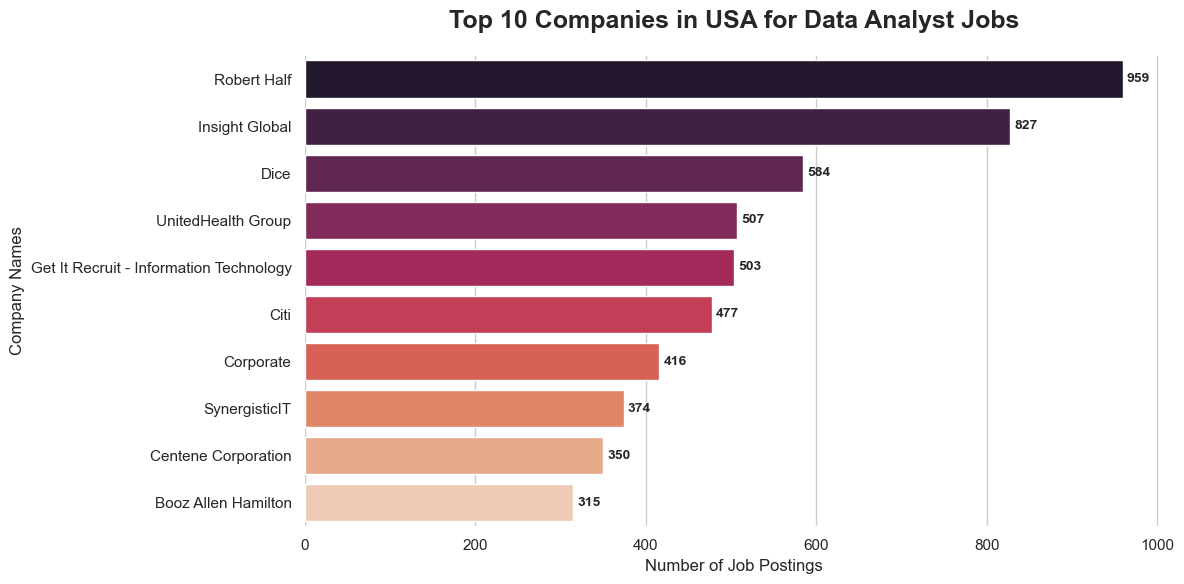

In [13]:
df_company_plot = df_DA_US['company_name'].value_counts().head(10).to_frame().reset_index()
df_company_plot.columns = ['Company Name', 'Job Count']

# reversing the data frame
df_company_plot = df_company_plot.sort_values('Job Count', ascending=False)

# Set seaborn style
sns.set_theme(style="whitegrid")

# create a barplot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=df_company_plot,
    x='Job Count',
    y='Company Name',
    hue='Company Name',
    palette='rocket',
    legend=False,
    edgecolor='white'
)

# Add titles and labels
plt.title('Top 10 Companies in USA for Data Analyst Jobs', fontsize=18, weight='bold', pad=20, loc='center')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Company Names', fontsize=12)

# Add numeric labels on bars
for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, weight='bold')

# Style tweaks
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()